In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
df = pd.read_csv("../Data_Analysis/df_nnz.csv")

In [147]:
df

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA2,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity
0,0.0065,1.3763,1,1,2.757,1.071,-0.05,4.00,37.0,3,...,40.50,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0
1,0.0554,0.2643,2,1,2.757,1.071,-0.05,4.00,37.0,3,...,40.50,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0
2,0.0355,8.363,3,1,2.757,1.071,-0.05,4.00,37.0,3,...,52.00,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0
3,0.2277,0.4382,4,1,2.757,1.071,-0.05,4.00,37.0,3,...,52.00,37.30,6.500000,6.000000,5.992739,-0.254557,-0.254557,-1.987595,1.000007,0.0
4,0.0173,1.0272,5,1,2.757,1.071,-0.05,4.00,37.0,3,...,40.50,37.30,6.500000,5.992739,6.000000,-0.398299,0.037337,-1.987595,1.000007,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,0.122,1.51E-06,1198,2,2.280,1.350,1.20,7.00,41.4,3,...,45.78,132.13,-1.700000,5.992739,0.000000,-0.398299,0.037337,-2.178395,0.999984,0.0
1126,0.027,0.000252,1199,2,2.280,1.350,1.20,3.00,33.0,1,...,40.50,375.75,-10.800000,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0
1127,0.035,0.000177,1200,2,2.280,1.350,1.20,7.00,33.0,1,...,40.50,375.75,-10.800000,5.992739,0.000000,-0.398299,0.037337,-2.441399,0.480347,725.0
1128,0.163,4.08E-05,1201,2,1.937,0.853,0.78,4.00,42.4,1,...,45.78,30.00,-1.600000,5.992739,0.000000,-0.398299,0.037337,-2.379344,0.999951,0.0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Km                  1130 non-null   object 
 1   Vmax                1130 non-null   object 
 2   id                  1130 non-null   int64  
 3   activity            1130 non-null   int64  
 4   X                   1130 non-null   float64
 5   IR                  1130 non-null   float64
 6   pot2                1130 non-null   float64
 7   ph                  1127 non-null   float64
 8   temp                1129 non-null   float64
 9   dstr                1130 non-null   int64  
 10  cryst               1130 non-null   float64
 11  lgCmin              1130 non-null   float64
 12  lgCmax              1130 non-null   float64
 13  Cmin                1130 non-null   float64
 14  Cmax                1130 non-null   float64
 15  lgCconst            1130 non-null   float64
 16  Cconst

In [149]:
def to_numeric_column(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

def counts_quantil(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR)))
    num_outliers = outliers.sum()
    filtered_data = column[~outliers]

    return num_outliers



def del_quantil(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

    return df

def do_numpy_squer(series):
    list1 = series.tolist()
    return np.square(list1)

def to_drow_hist(series):
    series.plot(kind='kde')
    plt.xlabel(f'Значения {series.name}')
    plt.ylabel('Частота')
    plt.title('Нормальное распределение')
    plt.show()

In [150]:
df = to_numeric_column(df, 'Vmax')
df = to_numeric_column(df, 'Km')

In [151]:
df['Vmax'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1130 entries, 0 to 1129
Series name: Vmax
Non-Null Count  Dtype  
--------------  -----  
1059 non-null   float64
dtypes: float64(1)
memory usage: 9.0 KB


In [152]:
df['Km'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1130 entries, 0 to 1129
Series name: Km
Non-Null Count  Dtype  
--------------  -----  
1120 non-null   float64
dtypes: float64(1)
memory usage: 9.0 KB


In [153]:
df = df.dropna(subset=['Vmax', 'Km'], axis =0)
df_nan = df.isna().mean().sort_values(ascending = False)

In [154]:
df_colums = ['ph','Complexity','temp']
nan_rows = df[df[df_colums].isnull().any(axis=1)]

In [155]:
df = df.dropna(axis =0)
df_nan = df.isna().mean().sort_values(ascending = False)

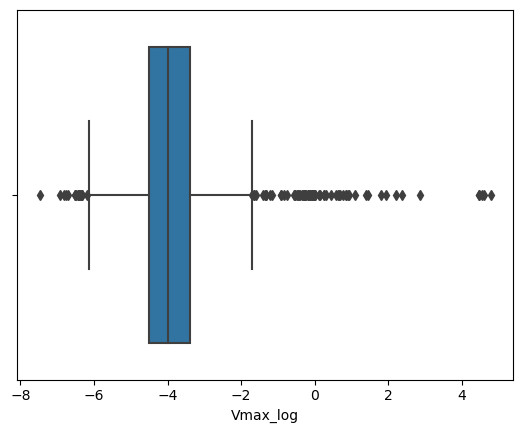

In [156]:
df.loc[:, 'Vmax_log'] = np.log10(df['Vmax'])
sns.boxplot(x=df['Vmax_log'])
plt.show()

In [157]:
df = del_quantil(df, 'Km')
print(counts_quantil(df['Km']))
print(counts_quantil(df['Vmax_log']))

128
58


In [158]:
zero_counts = df.isin([0]).mean().sort_values(ascending = False)

In [159]:
zero_counts

VSA_EState4           0.808105
Complexity            0.805721
EState_VSA6           0.789035
SMR_VSA7              0.686532
PEOE_VSA8             0.660310
PEOE_VSA7             0.654350
PEOE_VSA9             0.634088
EState_VSA4           0.624553
MinAbsEStateIndex     0.558999
VSA_EState8           0.543504
BCUT2D_CHGLO          0.516091
BalabanJ              0.487485
polym                 0.470799
MinEStateIndex        0.467223
TPSA                  0.461263
XLogP                 0.457688
Sufrace               0.436234
MinPartialCharge      0.436234
Kappa2                0.436234
MolWt                 0.430274
Mcoat                 0.424315
Complexity1           0.344458
lgCconst              0.221692
MaxEStateIndex.2      0.177592
Cconst                0.171633
lgCmax                0.095352
lgCcat                0.047676
lgCmin                0.040524
MinPartialCharge.1    0.016687
MaxEStateIndex.1      0.016687
MaxPartialCharge.1    0.016687
cryst                 0.015495
Cmin    

In [160]:
df.dropna(subset=['Cconst'], inplace=True)

In [161]:
df['Cconst'].info()

<class 'pandas.core.series.Series'>
Index: 839 entries, 0 to 1128
Series name: Cconst
Non-Null Count  Dtype  
--------------  -----  
839 non-null    float64
dtypes: float64(1)
memory usage: 13.1 KB


In [162]:
df.describe()

,Km,Vmax,id,activity,X,IR,pot2,ph,temp,dstr,...,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity,Vmax_log
count,839.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,1.406910,2.284246e+02,596.144219,1.189511,2.527696,1.206629,0.274352,4.506329,33.330274,2.682956,...,61.975328,16.029653,6.164966,5.012076,-0.358436,-0.040647,-0.979636,149.307192,88.529201,-3.795491
std,2.907154,3.074768e+03,352.986207,0.427106,0.270383,0.179094,0.554609,1.200939,9.300664,0.667759,...,134.680468,37.046987,1.427754,2.422942,0.107470,0.165174,1.030348,941.892328,462.418715,1.343715
min,0.000100,3.400000e-08,1.000000,1.000000,1.830000,0.700000,-1.358000,2.000000,15.000000,1.000000,...,0.000000,-21.400000,0.000000,0.000000,-0.870233,-0.254557,-2.590745,0.000000,0.000000,-7.468521
25%,0.089650,3.120000e-05,291.500000,1.000000,2.280000,1.084000,-0.078800,4.000000,25.000000,3.000000,...,0.000000,0.000000,5.992739,5.992739,-0.398299,-0.254557,-2.048433,0.000000,0.000000,-4.505845
50%,0.269000,1.020000e-04,587.000000,1.000000,2.579000,1.217200,0.051900,4.000000,31.000000,3.000000,...,20.310000,0.000000,5.992739,6.000000,-0.398299,0.037337,0.000000,0.621236,0.000000,-3.991400
75%,0.952500,3.535000e-04,888.500000,1.000000,2.750000,1.336000,0.619000,4.500000,40.000000,3.000000,...,66.480000,5.400000,6.000000,6.000000,-0.254557,0.037337,0.000000,1.000032,0.000000,-3.451632
max,16.540000,5.988500e+04,1201.000000,4.000000,3.170000,1.710000,1.690000,9.000000,90.000000,3.000000,...,1154.410000,153.000000,12.142874,11.503714,0.000000,1.000000,0.000000,11696.537820,5020.000000,4.777318


In [163]:
df.loc[df.polym == 0, 'polym'].count()

395

In [164]:
df.loc[df.polym == 0, 'polym'].index

Index([  10,   27,   34,   35,   36,   37,   38,   39,   40,   41,
       ...
       1086, 1087, 1090, 1091, 1092, 1103, 1104, 1109, 1110, 1118],
      dtype='int64', length=395)

In [165]:
for i in range(21, 48):  
    list = do_numpy_squer(df.iloc[:, i])
    df.iloc[:, i] = pd.Series(list)

In [166]:
df.iloc[:, 21:48].describe()

,Sufrace,MolWt,PEOE_VSA7,PEOE_VSA9,VSA_EState8,Kappa2,BalabanJ,MinAbsEStateIndex,MinEStateIndex,EState_VSA6,...,TPSA2,TPSA,XLogP,MaxEStateIndex.1,MaxEStateIndex.2,MinPartialCharge.1,MaxPartialCharge.1,BCUT2D_CHGLO,polym,Complexity
count,839.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000,8.390000e+02,839.000000,839.000000,839.000000,...,839.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,8.390000e+02,8.390000e+02
mean,0.223933,1.123310e+05,402.600347,387.767758,14.067412,552.032331,2.934564e+00,0.151490,1.767591,55.135471,...,3237.820429,2.195815e+04,1627.793171,40.042859,30.984554,0.140012,0.028902,2.020040,9.083964e+05,2.214136e+05
std,0.400481,4.569647e+05,2022.830145,3587.501785,52.335971,5150.093906,5.228400e+00,0.386022,4.344050,480.433286,...,26965.648109,1.180551e+05,4538.912564,20.962501,18.439461,0.089168,0.066588,2.207573,1.002616e+07,1.949152e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,1640.250000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,1640.250000,0.000000e+00,0.000000,35.912916,35.912916,0.064799,0.001394,0.000000,0.000000e+00,0.000000e+00
50%,0.040000,5.635054e+03,0.000000,0.000000,0.000000,3.949077,5.314410e-15,0.000000,0.015625,0.000000,...,1640.250000,4.124961e+02,0.160000,35.912916,36.000000,0.158642,0.001394,0.000000,3.859342e-01,0.000000e+00
75%,0.040000,6.659961e+04,159.284000,43.650889,13.142681,47.884426,5.062500e+00,0.043403,1.487617,0.000000,...,2704.000000,4.419590e+03,42.250000,36.000000,36.000000,0.158642,0.064799,4.196077,1.000064e+00,0.000000e+00
max,1.000000,6.218370e+06,38184.278804,69841.422879,775.699429,66557.759745,2.133804e+01,3.515625,37.051167,13529.067865,...,779689.000000,1.332662e+06,23409.000000,147.449397,132.335425,0.757305,1.000000,6.711961,1.368090e+08,2.520040e+07


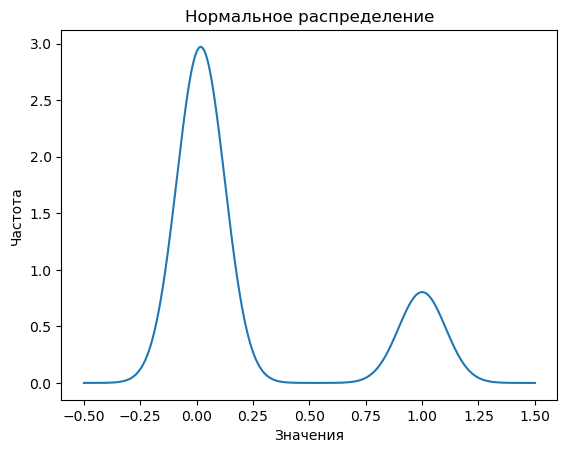

In [167]:
df.iloc[:, 21].plot(kind='kde')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Нормальное распределение')
plt.show()

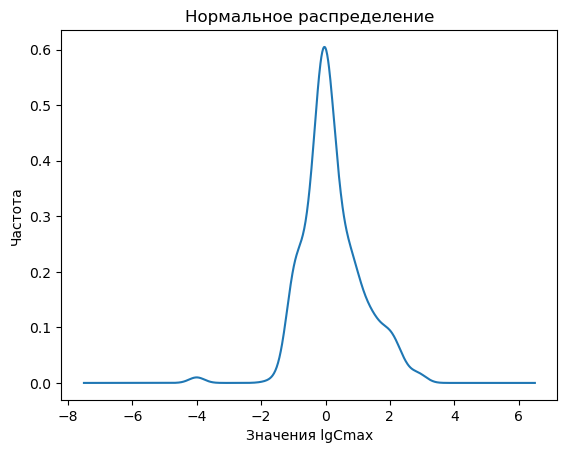

In [178]:
to_drow_hist(df.iloc[:, 12])